In [213]:
#preamble
import numpy as np
import pylab
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.ticker as mtick
%matplotlib inline
import datetime
from datetime import date
import time
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
sns.set_style("white")
sns.color_palette("Set2", 6)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import plotly
plotly.tools.set_credentials_file(username='tefoneill', api_key='AVpXsPX92uuWXX8vqJeU')
#plotly.offline.init_notebook_mode()

#read in the data
drivers = pd.read_csv('/Users/teresaoneill/Dropbox/Thinkful/Datasets/bad-drivers.csv')
drivers.columns = ['state',
                   'fatal_per_billion',
                   'speeding',
                   'alcohol',
                   'not_distracted',
                   'no_previous',
                   'premium',
                   'loss']
drivers[['fatal_per_billion', 
         'speeding',
         'alcohol',
         'not_distracted',
         'no_previous']].astype(float)

census = pd.read_csv('/Users/teresaoneill/Dropbox/Thinkful/Datasets/statecensus.csv')
census.columns = ['state',
                  'population_2015',
                  'density_sqm',
                  'changes_%yr']
census[['population_2015',
        'density_sqm',
        'changes_%yr']].astype(float)

drivers2 = pd.merge(drivers, census, on='state', how='inner')

,state,fatal_per_billion,speeding,alcohol,not_distracted,no_previous,premium,loss,population_2015,density_sqm,changes_%yr
0,Alabama,19%,39,30,96,80,785%,145%,4858979,93%,0%
1,Alaska,18%,41,25,90,94,"1,053%",134%,738432,1%,1%
2,Arizona,19%,35,28,84,96,899%,110%,6828065,60%,1%
3,Arkansas,22%,18,26,94,95,827%,142%,2978204,56%,0%
4,California,12%,35,28,91,89,878%,166%,39144818,239%,1%
5,Colorado,14%,37,28,79,95,836%,140%,5456574,52%,2%
6,Connecticut,11%,46,36,87,82,"1,069%",167%,3590886,648%,0%
7,Delaware,16%,38,30,87,99,"1,138%",151%,945934,380%,1%
8,District of Columbia,6%,34,27,100,100,"1,274%",136%,672228,"9,836%",2%
9,Florida,18%,21,29,92,94,"1,160%",144%,20271272,308%,2%


## Background ##

In this drill, we will analyze information from two datasets. The first is a dataset from fivethirtyeight containing information about fatal traffic accidents in the United States. The data were used in the article "Dear Mona, Which State Has The Worst Drivers?". The dataset includes one categorical variabel (state) and seven continuous variables:

1. Number of drivers involved in fatal collisions per billion miles
2. Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
3. Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
4. Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
5. Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
6. Car Insurance Premiums
7. Losses incurred by insurance companies for collisions per insured driver

The second is state population data from the US Census, including 2015 population, density per square mile, and percent growth.

### One variable four ways ###
Let's plot the "speeding" variable four ways, and assess the advantages and disadvantages of each plot. The plot below includes four subplots: a barplot, a boxplot, a violin plot, and a normalized histogram.

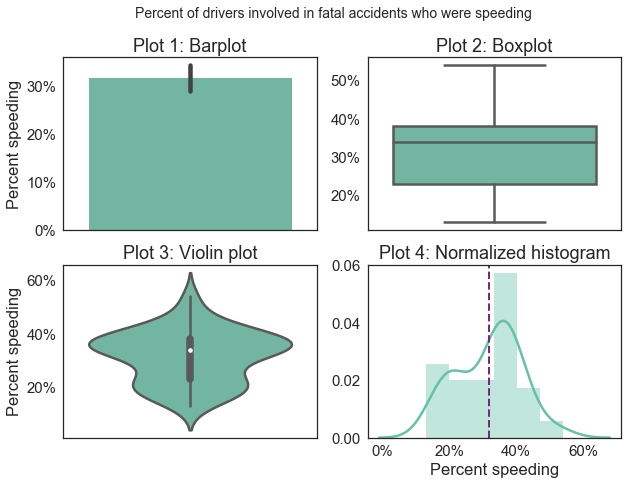

In [214]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)
#sns.set(style='white', palette='Set2')

g = sns.barplot(y='speeding',data=drivers2, ci=95, ax=axes[0,0])
g.set(xlabel='', ylabel='Percent speeding', title='Plot 1: Barplot')
g.yaxis.set_major_formatter(tick)

g = sns.boxplot(y='speeding',data=drivers, ax=axes[0,1])
g.set(xlabel='', ylabel='', title='Plot 2: Boxplot')
g.yaxis.set_major_formatter(tick)

g = sns.violinplot(y='speeding',data=drivers, ax=axes[1,0])
g.set(xlabel='', ylabel='Percent speeding', title='Plot 3: Violin plot')
g.yaxis.set_major_formatter(tick)

g = sns.distplot(drivers['speeding'])  
plt.axvline(drivers['speeding'].mean(), color='#762a83', linestyle='dashed', linewidth=2)
g.set(xlabel='Percent speeding', ylabel='', title='Plot 4: Normalized histogram')
g.xaxis.set_major_formatter(tick)

plt.suptitle('Percent of drivers involved in fatal accidents who were speeding', fontsize=14)
plt.setp(axes)

First, we will use a barplot to visualize the distribution of the % speeding variable. Plot 1 shows the mean percentage of drivers involved in fatal accidents who were speeding by state, with a 95% confidence interval. While the inclusion of the error bar makes it clear that the variance in this group is rather small, the height of the bar itself conveys very little information about the distribution of the data.

Next, the boxplot in Plot 2 gives a better sense for the distribution and central tendancy of the data, since it breaks the data down by quartiles. The plot below makes it easy to see the interquartile range, as well as the minimum and maximum values. In this case, there are no outliers, but if there were, they would be visible as well.

The violin plot gives even more information than the boxplot. Plot 3, like the boxplot above, shows the median and the interquartile range, but in addition to rich information about the variance of the data, it also shows how much data is in each range. We can see in the width of the plot that the quartile above the mean is denser than the others. A disadvantage of the violin plot is that it is not used as frequently, so a nontechnical audience may not be able to read it without guidance. 

Finally, Plot 4 uses a normalized histogram to plot the same data. A histogram offers a more granular view of how much data there is in each bin, depending on the density of the bins. The histogram is especially useful for visualizing what kind of distribution a variable has. On the other hand, since the data has been normalized, the histogram does not give the reader a clear idea of how many observations there are in each bin.

### Two variables three ways ###

Here, we'll plot the relationship bewteen the percentage of drivers who were speedind and the percentage of drivers who were alcohol-impaired when they were involved in a fatal accident.

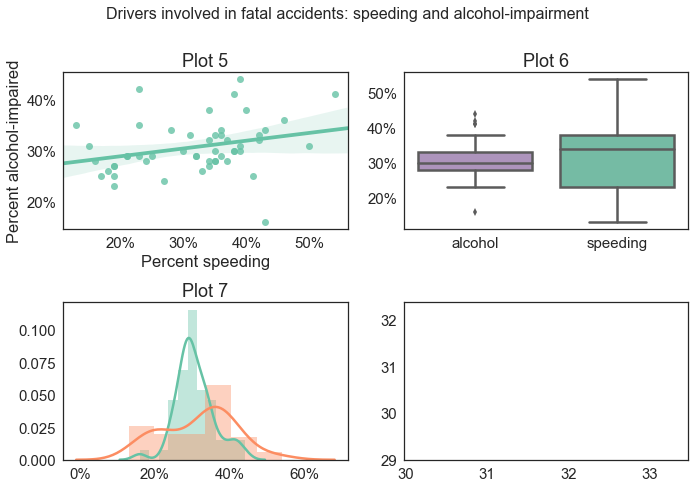

In [263]:
f, axes = plt.subplots(2, 2, figsize=(10, 7))
fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)

drivers1 = drivers[['alcohol','speeding']]

with sns.color_palette(['#af8dc3', '#69c7a8']):
    g = sns.regplot(x='speeding', y='alcohol', data=drivers, ax=axes[0,0])
    g.set(xlabel='Percent speeding', ylabel='Percent alcohol-impaired', title='Plot 5')
    g.yaxis.set_major_formatter(tick)
    g.xaxis.set_major_formatter(tick)

    g = sns.boxplot(data=drivers1, ax=axes[0,1])
    g.set(xlabel='', ylabel='', title='Plot 6')
    g.yaxis.set_major_formatter(tick)

#Why is the palette being ignored in this subplot?
    g = sns.distplot(drivers['alcohol'], ax=axes[1,0])
    g = sns.distplot(drivers['speeding'], ax=g)
    g.xaxis.set_major_formatter(tick)
    g.set(xlabel='', ylabel='', title='Plot 7')

    plt.suptitle('Drivers involved in fatal accidents: speeding and alcohol-impairment', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.setp(axes)

Plot 5 uses a scatterplot with a regression line and a confidence interval to depict the relationship between two continuous variables. The value of this plot is that it shows, for each state, how the two values are related. On the other hand, the relative distributions of the two variables cannot easily be interpreted from the scatterplot. Plot 6, which shows side-by-side boxplots, allows the distributions of the two variables to be easily compared; however, it does not show the relationship between them. Similarly, Plot 7, which shows two normalized histrograms, visualizes the distributions of the two variables without showing the relationship between them.  

### One continuous, one categorical, six ways ###

Now, let's plot a categorical variable and a continuous variable. We will use the state population and population density data to create categorical variables by binning the states. For the categorical variable, we will use the number of drivers involved in fatal accidents per billion miles driven.

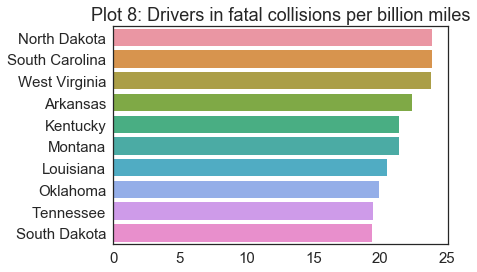

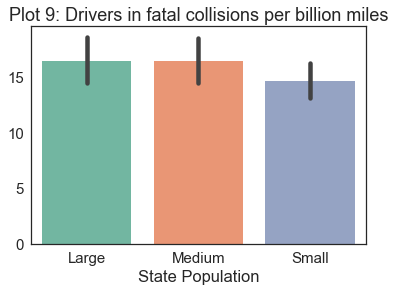

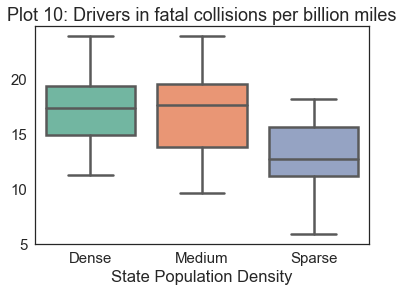

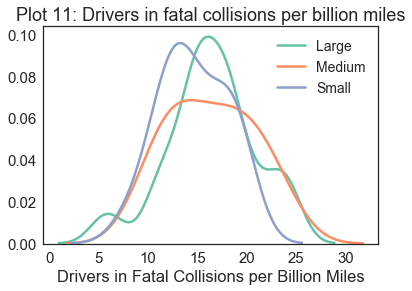

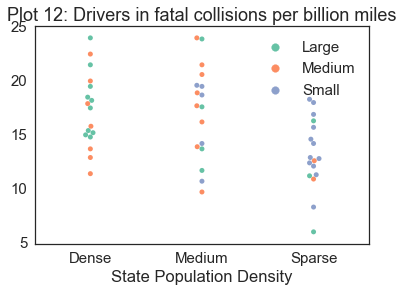

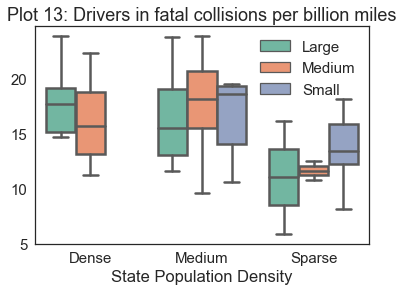

In [293]:
top_ten = drivers2.nlargest(10, 'fatal_per_billion')
density = pd.qcut(drivers2['density_sqm'], 3, labels=['Dense','Medium','Sparse'])
population = pd.qcut(drivers2['population_2015'], 3, labels=['Large','Medium','Small'])

fmt = '{x:,.0f}%'
tick = mtick.StrMethodFormatter(fmt)

ax = sns.barplot(x='fatal_per_billion', y='state', data=top_ten)
ax.set(xlabel='', ylabel='', title='Plot 8: Drivers in fatal collisions per billion miles')
plt.show()

ax = sns.barplot(x=population, y='fatal_per_billion', data=drivers2)
ax.set(xlabel='State Population', ylabel='', title='Plot 9: Drivers in fatal collisions per billion miles')
plt.show()

ax = sns.boxplot(y='fatal_per_billion', x=density, data=drivers2)
ax.set(xlabel='State Population Density', ylabel='', title='Plot 10: Drivers in fatal collisions per billion miles')
plt.show()

Large = drivers2.loc[(population=='Large'),'fatal_per_billion']
Medium = drivers2.loc[(population=='Medium'),'fatal_per_billion']
Small = drivers2.loc[(population=='Small'),'fatal_per_billion']

ax = sns.kdeplot(Large)
ax = sns.kdeplot(Medium, ax=ax)
ax = sns.kdeplot(Small, ax=ax)
ax.set(xlabel='Drivers in Fatal Collisions per Billion Miles', ylabel='', title='Plot 11: Drivers in fatal collisions per billion miles')
ax.legend(labels=['Large','Medium', 'Small'], fontsize=14)
plt.show()

ax = sns.swarmplot(y='fatal_per_billion', x=density, hue=population, data=drivers2)
ax.set(xlabel='State Population Density', ylabel='', title='Plot 12: Drivers in fatal collisions per billion miles')
plt.legend(loc='upper right')
plt.show()

ax = sns.boxplot(y='fatal_per_billion', x=density, hue=population, data=drivers2)
ax.set(xlabel='State Population Density', ylabel='', title='Plot 13: Drivers in fatal collisions per billion miles')
plt.legend(loc='upper right')
plt.show()

Of the plots above, Plot 13 is most effective at showing the relationship between involvement in fatal accidents, population size, and population density. Plot 8 is useful, but limited in the information it depicts, since it represents a single datapoint for each state. Similarly, Plot 9's value is limited, because it does not show the distribution of the continuous variable in each of the three bins of the categorical variable. 

Plot 10 is effective at conveying the distribution of fatal accidents in states with different population densities. Plot 11 shows the same information, providing more granularity at the level of the distribution of the continuous variable, at the expense of readability. 

Plots 12 and 13 provide more information, including state population size nested as a level of the population density factor. While Plot 12 shows how dense the data is within each bin, the color-coded swarmplot is rather difficult to process. Plot 13, on the other hand, shows the levels and sublevels of the categorical factor without sacrificing the clarity of the continuous variable. 

### Master Plot ###

Below is a first attempt at a choropleth map to show all the continuous data, while using the map to keep track of the categorical data. There are some bugs to work out still!

In [294]:
#I wanted to try something a bit more elaborate, 
#but the data is not actually showing up on the plot.

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

drivers['text'] = drivers['state']
    
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = drivers['state'],
        z = drivers['speeding'],
        locationmode = 'USA-states',
        text = drivers['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "title")
        ) ]

layout = dict(
        title = 'title',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict( data=data, layout=layout )
py.iplot(fig, filename='d3-cloropleth-map')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tefoneill/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'
